# Data Structures and Tensors in PyTorch

In this section, the fundamental data structures of PyTorch are presented, with special
emphasis on the concept of tensor, its creation, its main properties, and its central
role in deep learning. The purpose is to understand what a tensor is, how it is
constructed, what types exist, and why it is essential both in the design and
experimentation phases as well as during model training and inference.

Tensors constitute the basic data structure of PyTorch and can be considered a
generalization of scalars, vectors, and matrices to an arbitrary number of dimensions.
Each tensor stores numerical values ordered according to a determined shape, and can
reside in CPU or GPU. In practice, tensors are analogous to NumPy's `ndarray`, but are
optimized for intensive numerical computation and for acceleration through specialized
hardware, such as graphics processing units (GPUs).

Throughout this section, it is shown how to create tensors from predefined lists or
matrices, how to choose their data type (for example, integers or floats with different
precisions), and how to query and modify their basic properties, such as the number of
dimensions (`ndim`), the shape (`shape`), or the computing device on which they are
stored (`device`). These aspects are essential to ensure that operations between tensors
are compatible and executed efficiently.

## GPU Availability

In the context of machine learning, the use of GPUs allows significantly accelerating
tensor processing and the execution of large-scale neural models. PyTorch provides
utilities to verify if the system has a compatible GPU and to obtain information about
available devices. The following code snippet illustrates how to perform this check:

In [1]:
import torch

print(f"PyTorch version: {torch.__version__}")

if torch.cuda.is_available():
    print("GPU available")
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
else:
    print("No GPU detected, CPU will be used")

PyTorch version: 2.9.1+cu128
No GPU detected, CPU will be used


This type of check is especially useful at the beginning of a Jupyter notebook or
training script, as it allows dynamically adapting the code to available hardware, moving
tensors and models to the appropriate device through operations like `tensor.to("cuda")`
or `model.to("cuda")`.

## Introduction to Tensors

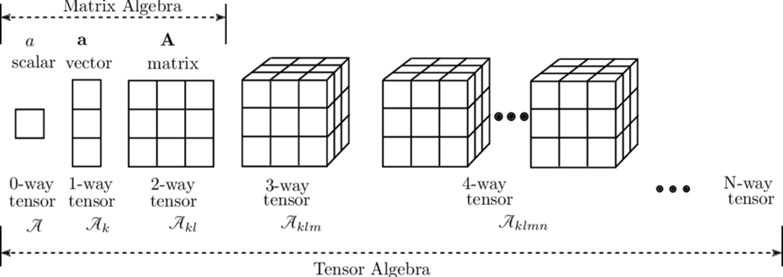

A tensor is the fundamental data structure in PyTorch. From an intuitive point of view, a
scalar is a 0-dimensional tensor, a vector is a 1-dimensional tensor, a matrix is a
2-dimensional tensor, and from there on, we speak of higher-order tensors (3D, 4D, etc.).
This generalization allows representing very diverse data, such as images, tokenized text
sequences, or multivariate time series, in a unified way.

Tensors allow storing data efficiently, both in CPU and GPU, and support a wide variety
of mathematical operations: additions, products, reductions, linear algebra operations,
and many others. Most deep learning algorithms are implemented as compositions of
operations on tensors.

### Creating Tensors: Scalars, Vectors, Matrices, and Higher-Order Tensors

PyTorch facilitates the creation of tensors of different dimensions. The following code
snippet illustrates how to construct a scalar, a vector, a matrix, and a higher-order
tensor:

In [2]:
# Scalar tensor
scalar = torch.tensor(7)
scalar

tensor(7)

A scalar has no additional dimensions, so its number of dimensions is 0:

In [3]:
scalar.ndim

0

To obtain the Python numerical value associated with the scalar, the `.item()` method is
used:

In [4]:
scalar.item()

7

From there, vectors (1-dimensional tensors) can be defined by providing a list of values:

In [5]:
# Creating a vector
vector = torch.tensor([7, 7])
print(vector)
print(vector.ndim)
print(vector.shape)

tensor([7, 7])
1
torch.Size([2])


In this case, `vector.ndim` returns `1`, and `vector.shape` indicates the vector's
length. Similarly, a matrix is represented as a list of lists, generating a 2-dimensional
tensor:

In [6]:
# Creating a matrix
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(matrix)
print(matrix.ndim)
print(matrix.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])
2
torch.Size([2, 3])


The above matrix has two rows and three columns, so its shape is `(2, 3)`.

Higher-order tensors are constructed by nesting additional lists. For example, the
following tensor has three dimensions, organized hierarchically:

In [7]:
# Creating a three-dimensional tensor
tensor = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [6, 4, 3]]])
print(tensor)
print(tensor.ndim)
print(tensor.shape)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[7, 8, 9],
         [6, 4, 3]]])
3
torch.Size([2, 2, 3])


The `shape` attribute describes the size of each dimension. Understanding this structure
is key to designing and interpreting neural network architectures, as the inputs and
outputs of each layer are represented as tensors with specific shapes.

### Creating Tensors with Values

In practice, it is very common to create test tensors or initialize model parameters
using random values. PyTorch allows creating tensors with values generated randomly from
different distributions. For example:

In [8]:
# Random tensors
random_tensor = torch.rand((2, 3, 4))
print(random_tensor)
random_tensor.ndim, random_tensor.shape

tensor([[[5.7400e-01, 5.9398e-01, 3.5953e-01, 8.2337e-01],
         [8.6268e-01, 9.4191e-01, 4.3498e-01, 3.3655e-01],
         [3.5048e-04, 6.0296e-01, 9.2302e-01, 8.2958e-01]],

        [[9.1116e-01, 9.6276e-01, 1.8200e-01, 8.7439e-02],
         [5.5204e-02, 9.5691e-01, 3.2401e-02, 8.3871e-01],
         [7.1381e-01, 5.7383e-01, 6.4101e-01, 4.6111e-01]]])


(3, torch.Size([2, 3, 4]))

Here a tensor with shape `(2, 3, 4)` is created whose elements are uniformly distributed
in the interval `[0, 1)`. This type of tensor is useful for:

1. Verifying that input and output dimensions of a model are coherent between layers.
2. Checking that internal operations are performed without errors before using real data.
3. Exploring model behavior in unit tests or quick experiments.

In addition to random tensors, it is common to use tensors initialized with zeros or
ones, for example, to define masks, templates, or initial values:

In [9]:
zero_tensors = torch.zeros((3, 4))
zero_tensors

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [10]:
ones_tensors = torch.ones((3, 4))
ones_tensors

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

You can also create tensors containing sequences of equally spaced values using
`torch.arange`:

In [11]:
range_tensor = torch.arange(start=0, end=100, step=2)
print(range_tensor)
print(f"Shape of 'range_tensor': {range_tensor.shape}")

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])
Shape of 'range_tensor': torch.Size([50])


This tensor contains values from 0 to 98 with a step of 2. From it, other tensors that
inherit its shape can be constructed:

In [12]:
# Create a tensor with the same dimension as another tensor
range_copy = torch.zeros_like(input=range_tensor)
print(f"Shape of 'range_copy': {range_copy.shape}")
range_copy

Shape of 'range_copy': torch.Size([50])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

The use of functions like `zeros_like` or `ones_like` facilitates creating tensors
compatible in shape and data type with existing ones.

### Data Types, Devices, and Tensor Compatibility

Each tensor in PyTorch is characterized, among other aspects, by its data type (`dtype`),
its shape (`shape`), and the computing device on which it resides (`device`). These
attributes influence operation compatibility and computational performance. When
operations are performed between tensors whose data types do not match, whose dimensions
are not compatible for the defined operation, or that are on different devices (for
example, one on CPU and another on GPU), conflicts and errors can occur during execution.

The following snippet shows how to inspect these properties:

In [13]:
tensor = torch.rand(size=(2, 2, 3))
tensor

tensor([[[0.7718, 0.1049, 0.9869],
         [0.4773, 0.7555, 0.0194]],

        [[0.9585, 0.5605, 0.2463],
         [0.9035, 0.8185, 0.7279]]])

In [14]:
print(f"Data type: {tensor.dtype}")
print(f"Shape: {tensor.shape}")
print(f"Device: {tensor.device}")

Data type: torch.float32
Shape: torch.Size([2, 2, 3])
Device: cpu


By default, floating-point tensors are created with type `torch.float32`. However, it is
possible to specify a different data type, such as `float16` or `float64`:

In [15]:
tensor = torch.rand(size=(2, 2, 3), dtype=torch.float16)
tensor

tensor([[[0.9858, 0.2075, 0.8999],
         [0.5190, 0.3960, 0.3691]],

        [[0.9673, 0.4751, 0.1538],
         [0.0098, 0.4932, 0.4702]]], dtype=torch.float16)

In [16]:
print(f"Data type: {tensor.dtype}")
print(f"Shape: {tensor.shape}")
print(f"Device: {tensor.device}")

Data type: torch.float16
Shape: torch.Size([2, 2, 3])
Device: cpu


The choice of numerical precision involves a trade-off between computational cost, memory
consumption, training stability, and result accuracy. For example, `float16` allows
significantly accelerating training and inference on appropriate hardware, but may
increase the risk of numerical stability problems in certain models.

In general, it is important that tensors involved in the same operation share a
compatible data type and are on the same device. Otherwise, it is necessary to explicitly
convert the type (`tensor.to(torch.float32)`, `tensor.int()`, etc.) or move the tensor to
the corresponding device (`tensor.to("cuda")`, `tensor.to("cpu")`).

### Basic Operations

Once tensors are created, PyTorch allows applying various reduction and aggregation
operations on them. For example, you can calculate maximums, means, or maximum indices
along specific dimensions. Consider the following two-dimensional tensor:

In [17]:
tensor = torch.rand(size=(2, 3))
tensor

tensor([[0.9088, 0.3539, 0.5875],
        [0.5185, 0.6261, 0.9729]])

The `max` method allows obtaining the maximum value along a dimension and its index:

In [18]:
# Maximum by columns (dimension 0)
tensor.max(dim=0)
# Maximum by rows (dimension 1)
tensor.max(dim=1)

torch.return_types.max(
values=tensor([0.9088, 0.9729]),
indices=tensor([0, 2]))

In this context, the convention is adopted that columns correspond to axis or dimension
`0`, while rows are associated with axis or dimension `1`. Similarly, the mean can be
calculated:

In [19]:
tensor.mean(dim=0), tensor.mean(dim=1)
torch.mean(tensor, dim=0), torch.mean(tensor, dim=1)

(tensor([0.7136, 0.4900, 0.7802]), tensor([0.6167, 0.7058]))

The `argmax` function returns the indices of maximum values along a determined dimension:

In [20]:
torch.argmax(tensor, dim=0), tensor.argmax(dim=0)
tensor.argmax(dim=1)

tensor([0, 2])

These indices can be used to select elements or substructures of the tensor. For example:

In [21]:
tensor
tensor[:, tensor.argmax(dim=1)[0]]

tensor([0.9088, 0.5185])

Here all rows and the column corresponding to the largest value of the first row are
selected, illustrating how to combine reduction operations with indexing.

### Indexing

PyTorch also allows performing advanced indexing operations and constructing submatrices
through slicing techniques. Consider a random matrix of size `(4, 4)`:

In [22]:
matrix = torch.rand((4, 4))
matrix

tensor([[0.2265, 0.9577, 0.1986, 0.8646],
        [0.2635, 0.8868, 0.8005, 0.1574],
        [0.5179, 0.3486, 0.5616, 0.7387],
        [0.5145, 0.3698, 0.6364, 0.3242]])

It is possible to extract submatrices taking one element out of every two in both
dimensions:

In [23]:
submatrix_1 = matrix[0::2, 0::2]
submatrix_2 = matrix[0::2, 1::2]
submatrix_3 = matrix[1::2, 0::2]
submatrix_4 = matrix[1::2, 1::2]

submatrix_1, submatrix_2, submatrix_3, submatrix_4

(tensor([[0.2265, 0.1986],
         [0.5179, 0.5616]]),
 tensor([[0.9577, 0.8646],
         [0.3486, 0.7387]]),
 tensor([[0.2635, 0.8005],
         [0.5145, 0.6364]]),
 tensor([[0.8868, 0.1574],
         [0.3698, 0.3242]]))

These submatrices can be stacked along a new dimension using `torch.stack`:

In [24]:
submatrices = torch.stack([submatrix_1, submatrix_2, submatrix_3, submatrix_4])
submatrices
submatrices.shape

torch.Size([4, 2, 2])

The result is a tensor in which each submatrix occupies a position along the first
dimension. If you want to add an additional dimension, you can use `unsqueeze`:

In [25]:
print(submatrices.shape)
submatrices = submatrices.unsqueeze(dim=0)
submatrices.shape

torch.Size([4, 2, 2])


torch.Size([1, 4, 2, 2])

From this tensor, different operations can be performed. For example, we will calculate
the Frobenius matrix norm (the Frobenius norm is equivalent to the square root of the sum
of squares of all matrix elements) of each submatrix using `torch.linalg.matrix_norm`:

In [26]:
norm = torch.linalg.matrix_norm(submatrices, ord="fro", dim=(-2, -1))
norm

tensor([[0.8212, 1.5270, 1.1748, 1.0262]])

Once the norms are calculated, you can select the submatrix with the highest norm using
`argmax` on the `norm` tensor:

In [27]:
submatrices[:, torch.argmax(norm), :, :]

tensor([[[0.9577, 0.8646],
         [0.3486, 0.7387]]])

This example illustrates how to combine indexing, stacking, dimension insertion, and
linear algebra operations to analyze and manipulate complex matrix structures within a
tensor.

### Reproducibility

Reproducibility constitutes a fundamental requirement in the development and evaluation
of machine learning models. In this context, reproducibility is understood as the ability
to obtain the same results when repeatedly executing an experiment under the same
conditions: same code, same data, same hyperparameter configuration and, especially
relevant, same random initialization.

In PyTorch, an important part of model behavior depends on random processes, such as the
initialization of neural network weights, the generation of tensors with random values,
or random data sampling during training. If these processes are not controlled, small
variations in initializations can produce different results in each execution, making it
difficult to compare experiments and debug errors.

To mitigate this problem, PyTorch provides mechanisms that allow fixing the seed of the
random number generator. One of the most used is the instruction:

In [28]:
torch.manual_seed(42)

This call initializes PyTorch's random number generator with a fixed seed, in this case
the value `42`. From that moment on, all random operations that depend on this generator
will produce the same sequence of values in successive executions, as long as the rest of
the conditions (PyTorch version, hardware, operation order, etc.) remain constant. In
this way, the creation of random tensors, the initialization of model parameters, and
other stochastic processes associated with PyTorch become deterministic.

The use of a fixed seed is especially important in experimentation and teaching
environments. In a teaching context, it allows all students to obtain the same results
when executing example notebooks, facilitating the follow-up of explanations and the
detection of possible conceptual or implementation errors. In a research and development
context, fixing the seed favors rigorous comparison between different models or
configurations, as it reduces variability attributable solely to chance.

It should be noted that, to achieve more complete reproducibility, it is often necessary
to also fix the seeds of other random number generators used in the same environment,
such as those from Python's standard libraries or NumPy.